### prepare

In [1]:
import repsim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

### data+computation

In [ ]:
# --------------------------------------------------
# prepare the prototype (replicating the R example)
# --------------------------------------------------
np.random.seed(1)

# Load iris data
iris = load_iris(as_frame=True).frame.iloc[:, :4]
# randomly select 50 rows, scale columns
X = StandardScaler().fit_transform(iris.sample(50, random_state=1))

# Load USArrests from R datasets (via seaborn's copy or manually)
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv"
usarrests = pd.read_csv(url, index_col=0)
Y = StandardScaler().fit_transform(usarrests)

n, p_X, p_Y = X.shape[0], X.shape[1], Y.shape[1]

# --------------------------------------------------
# generate 10 of each by perturbation
# --------------------------------------------------
mats = []
for _ in range(10):
    mats.append(X + np.random.normal(scale=1, size=(n, p_X)))
for _ in range(10):
    mats.append(Y + np.random.normal(scale=1, size=(n, p_Y)))

# check
len(mats), mats[0].shape, mats[-1].shape

# ----------------------------------------------------------
# Compute the similarity
# ----------------------------------------------------------
cka1 = repsim.hsic(mats, kernel_type="linear")
cka2 = repsim.hsic(mats, kernel_type="rbf")
cka3 = repsim.hsic(mats, kernel_type="rbf_mean")

### visualize

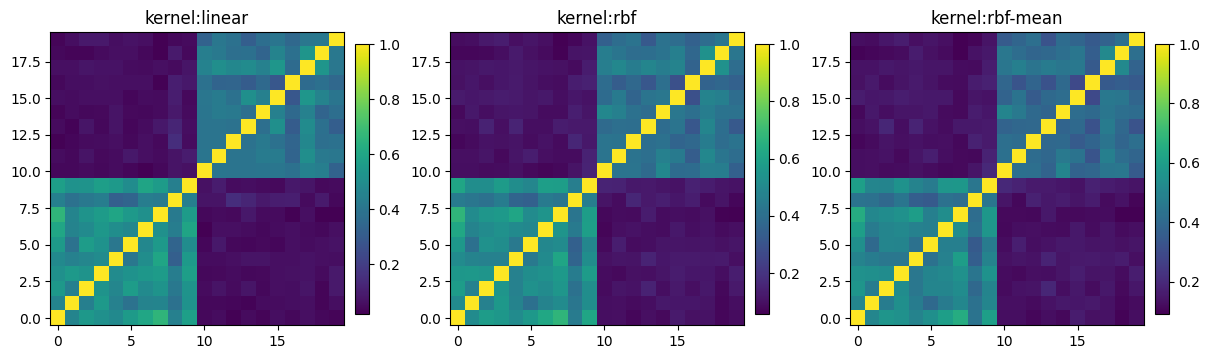

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
titles = ["kernel:linear", "kernel:rbf", "kernel:rbf-mean"]
mats = [cka1, cka2, cka3]

for ax, mat, title in zip(axes, mats, titles):
    im = ax.imshow(mat, cmap="viridis", origin="lower")
    ax.set_title(title)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()